In [530]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [531]:
df=pd.read_csv('data/imdb_scraped.csv')

In [532]:
df.head(3)

,Unnamed: 0,Title,Year,Genre,Director,Cast,Movie_id
0,0,Aama,(1964),"Action, Drama",Hira Singh Khatri\n |,"['Shiva Shankar', 'Bhubhan Chand', 'Bhim Bahad...",/title/tt1999819/
1,1,Maitighar,(1966),"Drama, Musical",B.S. Thapa\n |,"['Mala Sinha', 'Chidambar Prasad Lohani', 'Tik...",/title/tt7051562/
2,2,Hijo Aaja Bholi,(1968),Drama,Hira Singh Khatri\n |,"['Basundhara Bhusal', 'Bhubhan Chand', 'Shreed...",/title/tt8378014/


In [533]:
df=df.drop(columns='Unnamed: 0')

### NULL Values

In [534]:
df.isnull().sum()

Title        0
Year        16
Genre       76
Director    12
Cast         0
Movie_id     0
dtype: int64

In [535]:
df=df[~(df['Year']=='Notes')]

In [536]:
df['Year'].value_counts()

Year
(2018)          58
(2019)          52
(2017)          39
(2016)          39
(2022)          36
                ..
(III) (2013)     1
(II) (2014)      1
(I) (2015)       1
(IV) (2016)      1
(I)              1
Name: count, Length: 77, dtype: int64

### Cleaning year column

In [537]:
df['Year'].unique()

array(['(1964)', '(1966)', '(1968)', '(1971)', '(1973)', '(1977)',
       '(1978)', '(1980)', '(1981)', '(1982)', '(1983)', '(1984)',
       '(1985)', '(1987)', '(1989)', '(1990)', '(1991)', '(1993)',
       '(1994)', '(1995)', '(1996)', '(1997)', '(1998)', '(1999)',
       '(2000)', '(I) (2000)', '(2001)', '(I) (2001)', '(2002)', '(2003)',
       '(2004)', '(2005)', '(2006)', '(2007)', '(2008)', '(2009)',
       '(2010)', '(V) (2010)', '(2011)', '(II) (2011)', '(2012)',
       '(I) (2012)', '(2013)', '(II) (2013)', '(III) (2013)', '(2014)',
       '(II) (2014)', '(I) (2015)', '(2015)', '(2016)', '(IV) (2016)',
       '(III) (2016)', '(I) (2016)', '(II) (2016)', '(VI) (2016)',
       '(I) (2017)', '(2017)', '(III) (2017)', '(2018)', '(VII) (2018)',
       '(I) (2018)', '(II) (2018)', '(2019)', '(I) (2019)', '(V) (2019)',
       '(2020)', '(I) (2020)', '(2021)', '(VI) (2021)', '(2022)',
       '(II) (2022)', '(2023)', '(I) (2023)', '(II) (2023)', '(2024)',
       nan, '(III)', '(I)'], d

In [538]:
pattern=r'\((\d{4})\)'

In [539]:
def extract_year(s):
    match = re.search(pattern, s)
    if match:
        return match.group(1)
    else:
        return None

In [540]:
df['Year']=df['Year'].astype('str').apply(extract_year)
# df['Year'].astype('int')

In [541]:
df['Year']

0      1964
1      1966
2      1968
3      1971
4      1973
       ... 
645    None
646    None
647    None
648    None
649    None
Name: Year, Length: 650, dtype: object

In [542]:
df=df[~df['Year'].isnull()]

### Cleaning movie names

In [543]:
# df['Title']=df['Title'].str.lower()

In [544]:
df['Title'].unique()

array(['Aama', 'Maitighar', 'Hijo Aaja Bholi', 'Parivartan',
       'Man ko bandh', 'Kumari', 'Paral Ko Aago', 'Sindoor',
       'Raiders of the Lost Ark', 'Bansuri', 'Jeevan Rekha', 'Samjhana',
       'Kanchi', 'Basudev', 'Kusume Rumal', 'Saino', 'Anyay', 'Santan',
       'Cheli Beti', 'Lahure', 'Behuli', 'Maya Preeti', 'Bhagya Rekha',
       'Pachhis Basanta', 'Lobhi Papi', 'Bijay Parajay', 'Kanyadaan',
       'Yug Dekhi Yug Samma', 'Chino', 'Aadhi Beri', 'Dakshina', 'Deuta',
       'Dui Thopa Aansu', 'Sapana', 'Sauta', 'Adhikar', 'Mahadevi',
       'Mohani', 'Swarga', 'Janma Janma', 'Prithvi', 'Shree Swosthani',
       'Sannani', 'Mahamaya', 'Prem Pinda', 'Jeevan Sangharsha', 'Ragat',
       'Saraswati', 'Janma Bhoomi', 'Rahar', 'Gothalo', 'Seemana',
       'Bhariya', 'Chunauti', 'Raanko', 'Simarekha', 'Balidaan',
       'Karodpati', 'Shankar', 'Naso', 'Saathi', 'Allare',
       'Aadi Kabi Bhanubhakta', 'Thuldai', 'Nepali Babu', 'Afanta',
       'Nata Ragat Ko', 'Yo Maya Ko Sagar', 

In [545]:
movie_counts=df['Title'].value_counts()

In [546]:
movies_more_than_once = movie_counts[movie_counts > 1].index.values

In [547]:
df[df['Title'].isin(movies_more_than_once)]

,Title,Year,Genre,Director,Cast,Movie_id
0,Aama,1964,"Action, Drama",Hira Singh Khatri\n |,"['Shiva Shankar', 'Bhubhan Chand', 'Bhim Bahad...",/title/tt1999819/
527,Aama,2020,Drama,Dipendra K. Khanal\n |,"['Narendra Singh Dhami', 'Sarita Giri', 'Deshb...",/title/tt12320684/
603,Aincho Paincho,2023,Drama,Krisha Chaulagain\n |,"['Mukun Bhusal', 'Ramesh Budathoki', 'Koshish ...",/title/tt28549224/
610,Aincho Paincho,2023,Drama,Krisha Chaulagain\n |,"['Mukun Bhusal', 'Ramesh Budathoki', 'Koshish ...",/title/tt28549232/


In [548]:
df=df.drop([527,603,574,133])

In [549]:
nepali_to_english={
    'ए मेरो हजुर ४':'A Mero Hajur 4',
    'प्रेम गीत ३':'Prem Geet 3',
    'कबड्डी ४':'Kabaddi 4',
    'कबड्डी':'Kabaddi',
    'म यस्तो गीत गाउछु':'Ma Yesto Geet Gaauchu',
    'पाहुना':'Pahuna',
    'सेतो सुर्य':'White Sun',
    'जय हो':'Jai Ho'
}

In [550]:
for key, value in nepali_to_english.items():
    df['Title'] = df['Title'].str.replace(key, value)


In [551]:
df.shape

(628, 6)

**Cleaning Director name**

In [552]:
df['Director']

0      Hira Singh Khatri\n                 |
1             B.S. Thapa\n                 |
2      Hira Singh Khatri\n                 |
3      Hira Singh Khatri\n                 |
4          Prakash Thapa\n                 |
                       ...                  
627          Santosh Sen\n                 |
628                            Niren Shresth
629     Ramesh Mk Poudel\n                 |
630    Narayan Rayamajhi\n                 |
631           Kumud Pant\n                 |
Name: Director, Length: 628, dtype: object

In [553]:
df['Director'] = df['Director'].str.replace('\n', '').str.replace('|', '')


In [554]:
df[df['Director'].isnull()]

,Title,Year,Genre,Director,Cast,Movie_id
74,Apsara,2000,NaN,NaN,"['Sanchita Luitel', 'Bipana Thapa', 'Ramesh Up...",/title/tt0342048/
94,Yo Kasto Saino,2001,NaN,NaN,[''],/title/tt0314925/
100,Maya Ko Saino,2001,NaN,NaN,[''],/title/tt0304388/
102,Manai Ta Ho,2001,NaN,NaN,[''],/title/tt0304376/
107,Mitini,2002,Drama,NaN,"['Shivahari Poudel', 'Uttam Pradhan', 'Dilip R...",/title/tt0314385/
110,Maya Namara,2002,NaN,NaN,"['Sohail Bisht', 'Sanjeev Bisht', 'Ramit Dhung...",/title/tt0314362/
114,Santan Ko Maya,2002,NaN,NaN,[''],/title/tt0314611/
136,Yastai Rahecha Jindagi,2002,NaN,NaN,[''],/title/tt0314917/
150,Soltini,2005,"Action, Romance",NaN,[''],/title/tt1039910/
244,Loafer,2013,Action,NaN,"['Dayahang Rai', 'Anupam Sharma', 'Aaryan Sigd...",/title/tt27004829/


In [555]:
# df['Director'].value_counts().values

In [556]:
df[df['Title']=='Lalteen']


,Title,Year,Genre,Director,Cast,Movie_id
406,Lalteen,2017,"Action, Drama",NaN,"['Keki Adhikari', 'Janak Bartaula', 'Shishir B...",/title/tt6695976/


In [557]:
df.loc[df['Title'] == 'Lalteen','Director']='dev kumar shrestha'

In [558]:
new_row=df[df['Title']=='Lalteen']

In [559]:
df=df[~df['Director'].isnull()]

In [560]:
df[df['Director'].isnull()]

,Title,Year,Genre,Director,Cast,Movie_id


In [561]:
df['Director'].dtype

dtype('O')

In [562]:
def clean_director(director):
    # Split the director names using the delimiter (',')
    director_names = director.split(',')
    
    # Check if the name starts with 'S:'
    cleaned_names = [name.strip() if not name.startswith('s:') else name[2:].strip() for name in director_names]
    
    # Return the first cleaned name
    return cleaned_names[0]

# Apply the clean_director function to the "director" column
df['Director'] = df['Director'].apply(clean_director)

In [563]:
df[df['Title']=='Loot']

,Title,Year,Genre,Director,Cast,Movie_id
211,Loot,2012,"Crime, Drama, Thriller",Nischal Basnet,"['Saugat Malla', 'Karma Shakya', 'Dayahang Rai...",/title/tt2179133/


### Cleaning cast 

In [564]:
df['Cast'].value_counts()

Cast
['tor:\nPranitAcharjuNewar\n                 | \n    Star:\nPranitAcharjuNewar']    3
['Gauri Malla']                                                                     2
['Shiva Shankar', 'Bhubhan Chand', 'Bhim Bahadur', 'Basundhara Bhusal']             1
['Dayahang Rai', 'Deeya Pun', 'Buddhi Tamang', 'Barsha Raut']                       1
['Pradeep Khadka', 'Miruna Magar', 'Paramita Rana', 'Karma Shakya']                 1
                                                                                   ..
['Arpan Thapa', 'Samuna K.C', 'Dhurba Koirala', 'Kamala Regmi']                     1
['Niraj Baral', 'Priyanka Karki', 'Pooja Sharma', 'Devu Shrestha']                  1
['Madan Baral', 'Manju Devkota', 'Sunil Pokharel', 'Mahesh Shrestha']               1
['Nisha Adhikari', 'Gajit Bista', 'Rajesh Hamal', 'Karishma Manandhar']             1
['Kumud Pant', 'Janaki Pant']                                                       1
Name: count, Length: 614, dtype: int64

In [565]:
def find_no_of_cast(cast):
    cast=cast[1:-1].split(',')
    return len(cast)


In [566]:
df['cast_no']=df['Cast'].apply(find_no_of_cast)

In [567]:
df['Cast']=df["Cast"].str.strip("[]")
df=df[~df["Cast"].str.contains('tor:', case=False, na=False)]

In [568]:
df["Cast"] = df["Cast"].str.replace("'", '')

In [569]:
cast_no_counts=df['cast_no'].value_counts()

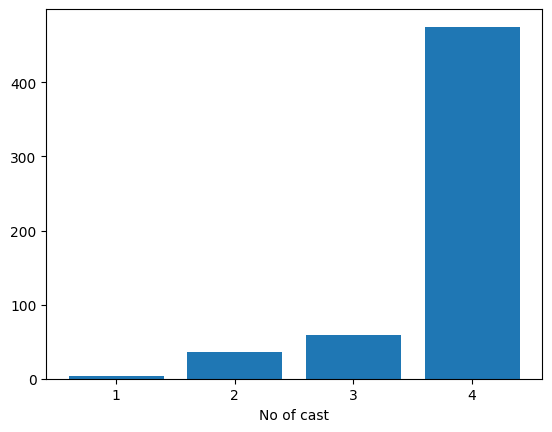

In [570]:
plt.bar(cast_no_counts.index,cast_no_counts.values)
plt.xticks(cast_no_counts.index)
plt.xlabel('No of cast')
plt.show()

In [571]:
# df['Cast']=df['Cast'].str.lower()

In [572]:
df[df['Cast']=="['']"]

,Title,Year,Genre,Director,Cast,Movie_id,cast_no


### Genres

In [573]:
# df['Genre']=df['Genre'].str.lower()

In [574]:
genre_counts=df['Genre'].value_counts()

In [575]:
genre_counts

Genre
Drama                          192
Romance                         50
Drama, Romance                  46
Comedy                          27
Action                          24
                              ... 
Animation, Biography, Drama      1
Comedy, Drama, Family            1
Action, Comedy, Romance          1
Comedy, Drama, Sci-Fi            1
Biography, Drama, History        1
Name: count, Length: 76, dtype: int64

In [576]:
genres=[]
for genre, count in genre_counts.items():
    # print(f'Genre: {genre}, Count: {count}')
    genres.extend(genre.split(','))
    

In [577]:
genres=[genre.strip() for genre in genres]
genres=set(genres)
genres=list(genres)

In [578]:
len(genres)

19

In [579]:
# with open('genres.txt','w') as genres_file:
#     for genre in genres:
#         genres_file.write(genre+ '\n')
     

In [580]:
df[df['Genre'].isnull()].shape

(49, 7)

In [581]:
movies_to_keep=['aafno manchhe','yug dekhi yug samma','sauta','prithvi','shankar','allare','afanta','nata ragat ko','yo maya ko sagar','aago','maya baiguni','aafno manchhe','buhari','aashirbad','siudo ko sindoor','jeevan saathi','daag','afno ghar afno manche','pijanda','muskan','mero hajur','mr. mangale','krodh']

In [582]:
movies_to_keep=['Aafno Manchhe','Yug Dekhi Yug Samma','Sauta','Prithvi','Shankar','Allare','Afanta','Nata ragat ko','Yo Maya Ko Sagar','Aago','Maya Baiguni','Aafno Manchhe','Buhari','Aashirbad','Siudo Ko Sindoor','Jeevan Saathi','Daag','Afno Ghar Afno Manche','Pijanda','Muskan','Mero Hajur','Mr. Mangale','Krodh']

In [583]:
# ids=df[df['Genre'].isnull()]['Movie_id'].values
# titles=df[df['Genre'].isnull()]['Title'].values
# for id,title in zip(ids,titles) :
#     print(f'{title} : https://www.imdb.com{id}')

In [584]:
df=df[df["Genre"].notna() | df["Title"].isin(movies_to_keep)]

In [585]:
df['Genre']=df['Genre'].fillna('drama')

### Poster url 

In [586]:
import requests
from bs4 import BeautifulSoup
def google_image(title,year):
   # return image url of given movie  
    movie_name=title.replace(' ','+')
    query = f"{movie_name}+nepali+movie+poster+{year}"  # the search query you want to make
    url = f"https://www.google.com/search?q={query}&tbm=isch"  # the URL of the search result page
    response = requests.get(url)  # make a GET request to the URL
    soup = BeautifulSoup(response.text, "html.parser")  # parse the HTML content with BeautifulSoup
    # find the first image link by searching for the appropriate tag and attribute
    img_tag = soup.find("img", {"class": "DS1iW"})
    img_link = img_tag.get("src")
    return img_link
    

In [587]:
df['poster_url'] = df.apply(lambda row: google_image(row['Title'], row['Year']), axis=1)


In [588]:
df.head()

,Title,Year,Genre,Director,Cast,Movie_id,cast_no,poster_url
0,Aama,1964,"Action, Drama",Hira Singh Khatri,"Shiva Shankar, Bhubhan Chand, Bhim Bahadur, Ba...",/title/tt1999819/,4,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,Maitighar,1966,"Drama, Musical",B.S. Thapa,"Mala Sinha, Chidambar Prasad Lohani, Tika Bhus...",/title/tt7051562/,4,https://encrypted-tbn0.gstatic.com/images?q=tb...
2,Hijo Aaja Bholi,1968,Drama,Hira Singh Khatri,"Basundhara Bhusal, Bhubhan Chand, Shreedhar Kh...",/title/tt8378014/,4,https://encrypted-tbn0.gstatic.com/images?q=tb...
3,Parivartan,1971,Drama,Hira Singh Khatri,"Yagya Nath Ghimire, Rita Thapa, Neer Bikram Sh...",/title/tt8379858/,4,https://encrypted-tbn0.gstatic.com/images?q=tb...
4,Man ko bandh,1973,Drama,Prakash Thapa,"Salyan K.C., Sushma Shahi, Neer Bikram Shah, B...",/title/tt1999922/,4,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [589]:
df.shape

(545, 8)

In [590]:
df.to_csv('data/cleaned_data.csv')